## ML ASSIGNMENT 03

NAME: IMAAD IMRAN HAJWANE  
SRN: 202101132  
ROLL: 23  
SEMESTER: 7  
TOPIC: IMPLEMENTATION OF SVM FOR CLASSIFICATION PROBLEM FOR TWO INDIVIDUAL DATASETS  

--------------------------------------------------------------------------------  -

### DATASET 01: GLOBAL AIR QUALITY

In [15]:
import pandas as pd

# Load the dataset
data_path = 'C:\\Users\\iamim\\OneDrive\\Desktop\\Seventh_Semester\\ML_LAB\\L3\\global_air_quality_data_10000.csv'  # Update this with the correct path to your CSV file
air_quality_df = pd.read_csv(data_path)

# Display the first few rows
print("Global Air Quality Dataset:")
print(air_quality_df.head())

# Display the dataset's basic information
print("\nDataset Info:")
print(air_quality_df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(air_quality_df.isnull().sum())


Global Air Quality Dataset:
             City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cit

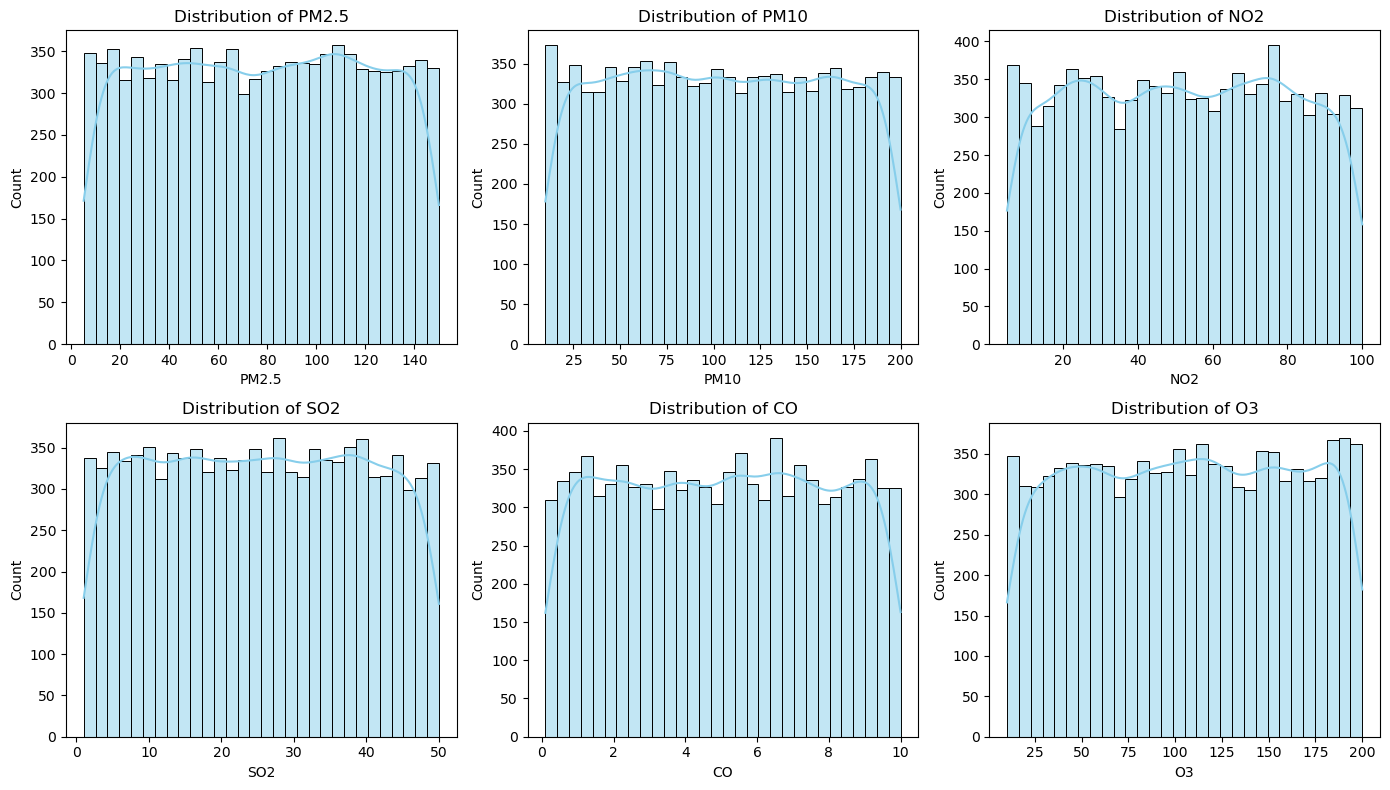

c:\Users\iamim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


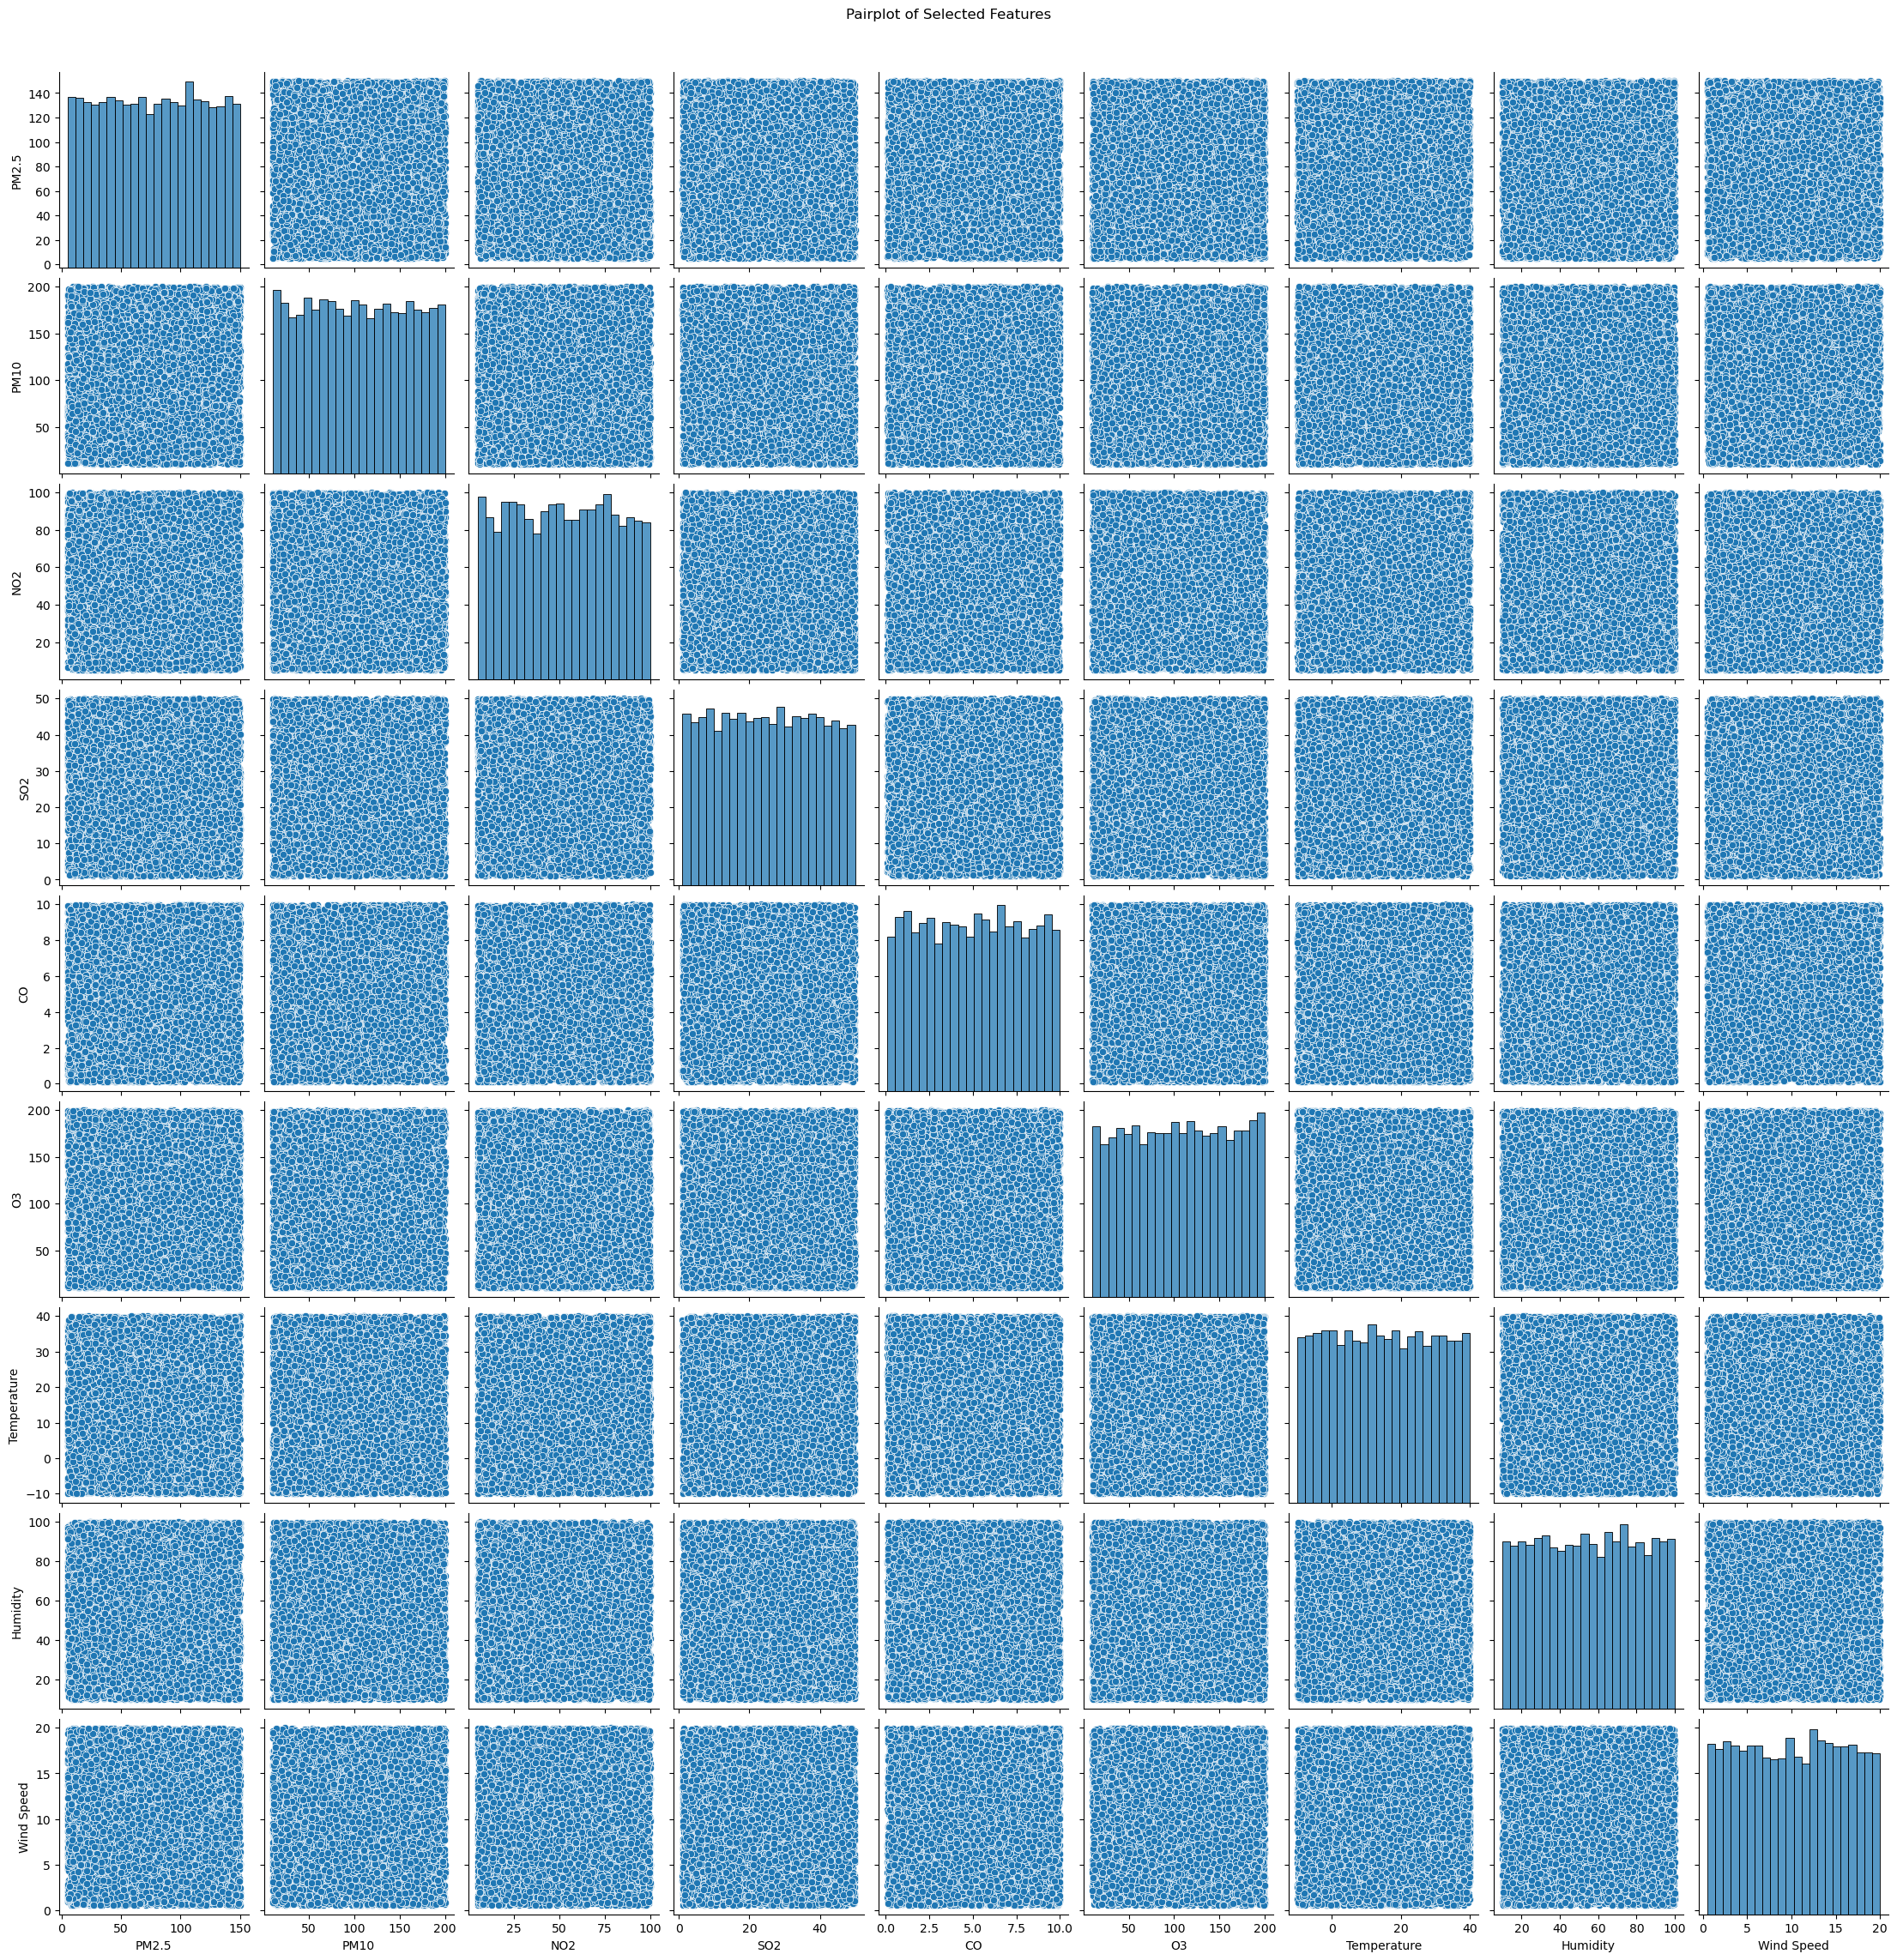

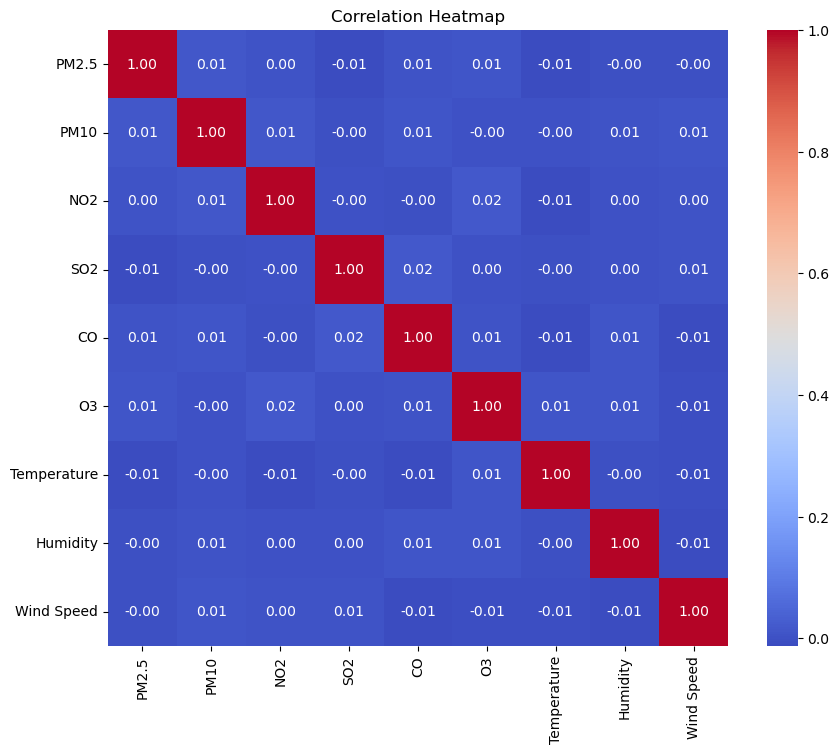

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric columns are used for plotting
numeric_df = air_quality_df.select_dtypes(include=[float, int])

# Plot distributions of pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

plt.figure(figsize=(14, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(numeric_df[pollutant], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {pollutant}')
plt.tight_layout()
plt.show()

# Pairplot for selected features
# Ensure only numeric columns are used
pairplot_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
sns.pairplot(numeric_df[pairplot_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values for numerical columns with median
numerical_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
air_quality_df[numerical_columns] = air_quality_df[numerical_columns].fillna(air_quality_df[numerical_columns].median())

# For categorical columns, fill missing values with the mode
categorical_columns = ['City', 'Country']
air_quality_df[categorical_columns] = air_quality_df[categorical_columns].fillna(air_quality_df[categorical_columns].mode().iloc[0])

# Encode 'City' and 'Country'
label_encoder_city = LabelEncoder()
label_encoder_country = LabelEncoder()
air_quality_df['City'] = label_encoder_city.fit_transform(air_quality_df['City'])
air_quality_df['Country'] = label_encoder_country.fit_transform(air_quality_df['Country'])


In [19]:
# Define the AQI levels based on PM2.5 values
def aqi_level(pm2_5):
    if pm2_5 <= 50:
        return 'Good'
    elif pm2_5 <= 100:
        return 'Moderate'
    elif pm2_5 <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif pm2_5 <= 200:
        return 'Unhealthy'
    elif pm2_5 <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Apply AQI level to the dataset
air_quality_df['AQI Level'] = air_quality_df['PM2.5'].apply(aqi_level)

# Encode the target variable
label_encoder_aqi = LabelEncoder()
air_quality_df['AQI Level'] = label_encoder_aqi.fit_transform(air_quality_df['AQI Level'])

# Display the encoded classes
print("\nEncoded Classes:")
print(label_encoder_aqi.classes_)

# Check class distribution
print("\nClass distribution in the dataset:")
print(air_quality_df['AQI Level'].value_counts())



Encoded Classes:
['Good' 'Moderate' 'Unhealthy for Sensitive Groups']

Class distribution in the dataset:
AQI Level
2    3480
1    3413
0    3107
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = air_quality_df.drop(['Date', 'AQI Level'], axis=1)  # Dropping 'Date' as it's not useful for classification
y = air_quality_df['AQI Level']

# Normalizing features
features_to_normalize = pollutants + ['Temperature', 'Humidity', 'Wind Speed']
scaler = StandardScaler()
X[features_to_normalize] = scaler.fit_transform(X[features_to_normalize])

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify class distribution after split
print("\nTraining class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTesting class distribution:")
print(pd.Series(y_test).value_counts())



Training class distribution:
AQI Level
2    2784
1    2730
0    2486
Name: count, dtype: int64

Testing class distribution:
AQI Level
2    696
1    683
0    621
Name: count, dtype: int64


In [35]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)    
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [36]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)



Accuracy: 0.98

Confusion Matrix:
[[616   5   0]
 [  8 661  14]
 [  0  14 682]]

Classification Report:
                                precision    recall  f1-score   support

                          Good       0.99      0.99      0.99       621
                      Moderate       0.97      0.97      0.97       683
Unhealthy for Sensitive Groups       0.98      0.98      0.98       696

                      accuracy                           0.98      2000
                     macro avg       0.98      0.98      0.98      2000
                  weighted avg       0.98      0.98      0.98      2000



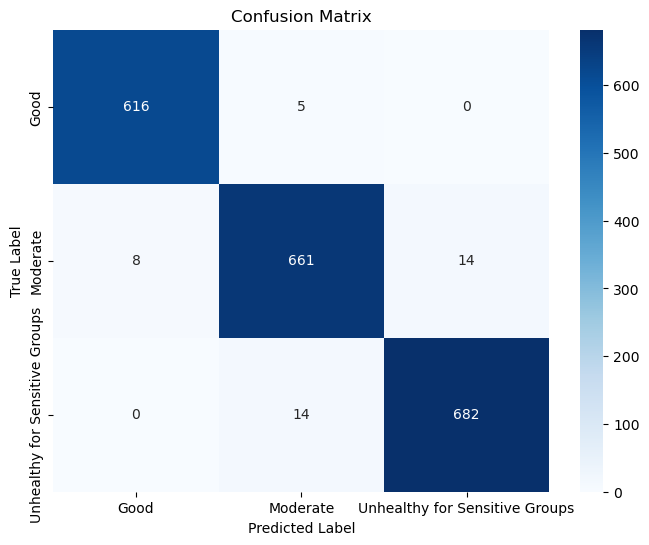

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder_aqi.classes_)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_aqi.classes_, yticklabels=label_encoder_aqi.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


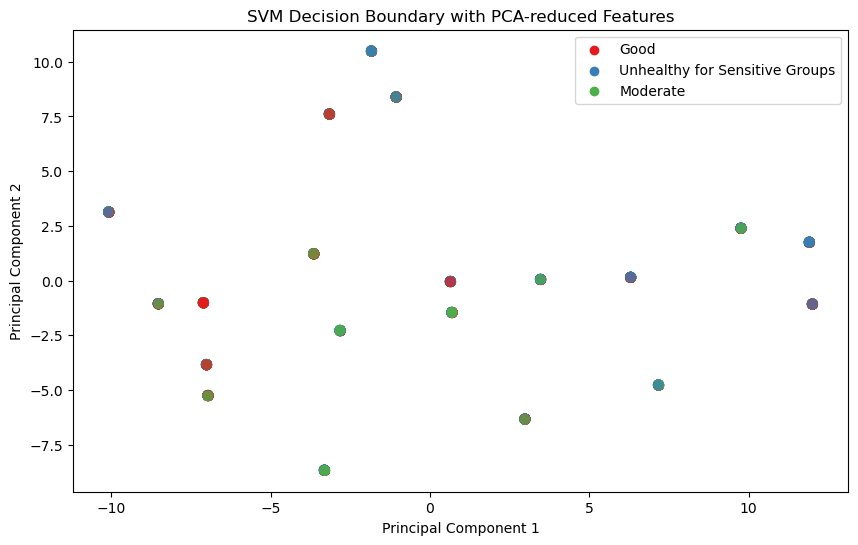

In [38]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM on reduced dimensions
svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=label_encoder_aqi.inverse_transform(y_test), palette='Set1', alpha=0.7, edgecolor=None, s=50)
plt.title('SVM Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [43]:
print(y_pred_prob.shape)


(2000,)


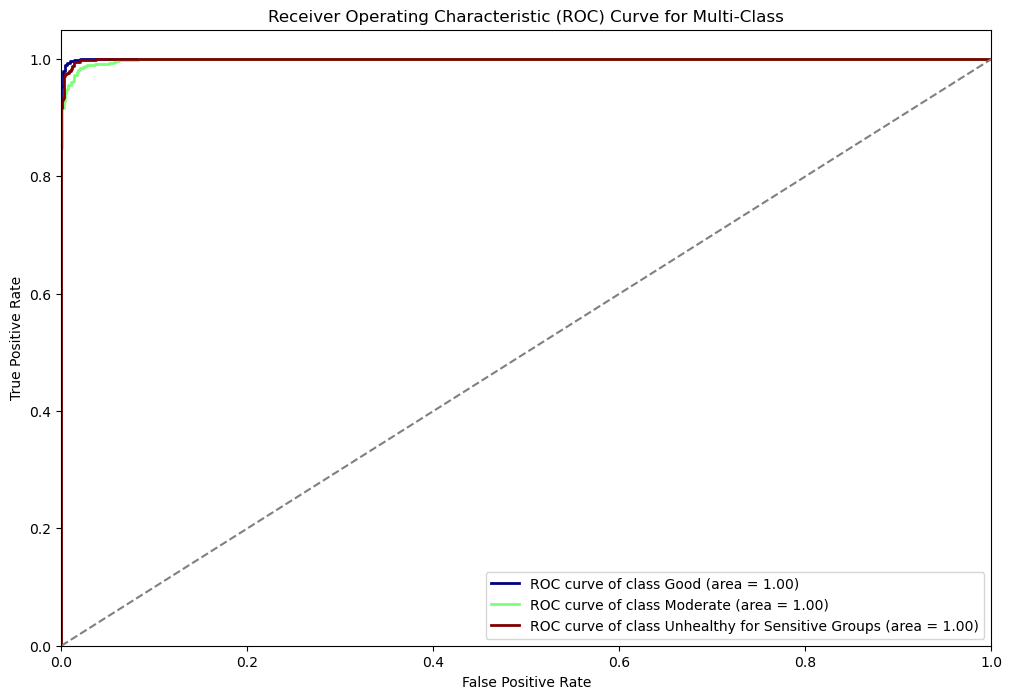

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Initialize and train the SVM model with probability estimates
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = svm_model.predict_proba(X_test)  # Probability estimates for each class

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder_aqi.classes_)))
n_classes = y_test_bin.shape[1]

# Calculate ROC curves and AUC for each class
plt.figure(figsize=(12, 8))
colors = plt.cm.jet(np.linspace(0, 1, n_classes))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve of class {label_encoder_aqi.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()


_________________________________________________________________________________________________

## DATASET: 02 HEART DISEASE DATASET

In [45]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\iamim\\OneDrive\\Desktop\\Seventh_Semester\\ML_LAB\\L3\\heart_disease_data_with_features.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   1       145   233    1        2      150      0      2.3  ...   
1   67    1   4       160   286    0        2      108      1      1.5  ...   
2   67    1   4       120   229    0        2      129      1      2.6  ...   
3   37    1   3       130   250    0        0      187      0      3.5  ...   
4   41    0   2       130   204    0        2      172      0      1.4  ...   

   chol_trestbps_ratio  log_thalach_chol  symptom_zscore  \
0             1.595890          0.919704       -0.275764   
1             1.776398          0.828936        0.568702   
2             1.892562          0.895083        1.572932   
3             1.908397          0.947695        1.595755   
4             1.557252          0.968116       -0.161647   

   avg_chol_by_age_group thalach_chol_diff symptom_severity_diff  \
0             260.024691               -83             -2.532099   
1             260.024691    

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak  ...  \
count  303.000000  303.000000  303.000000  303.000000  ...   
mean     0.990099  149.607261    0.326733    1.039604  ...   
std      0.994971   22.875003    0.469794    1.161075  ...   
min      0.000000   71

c:\Users\iamim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


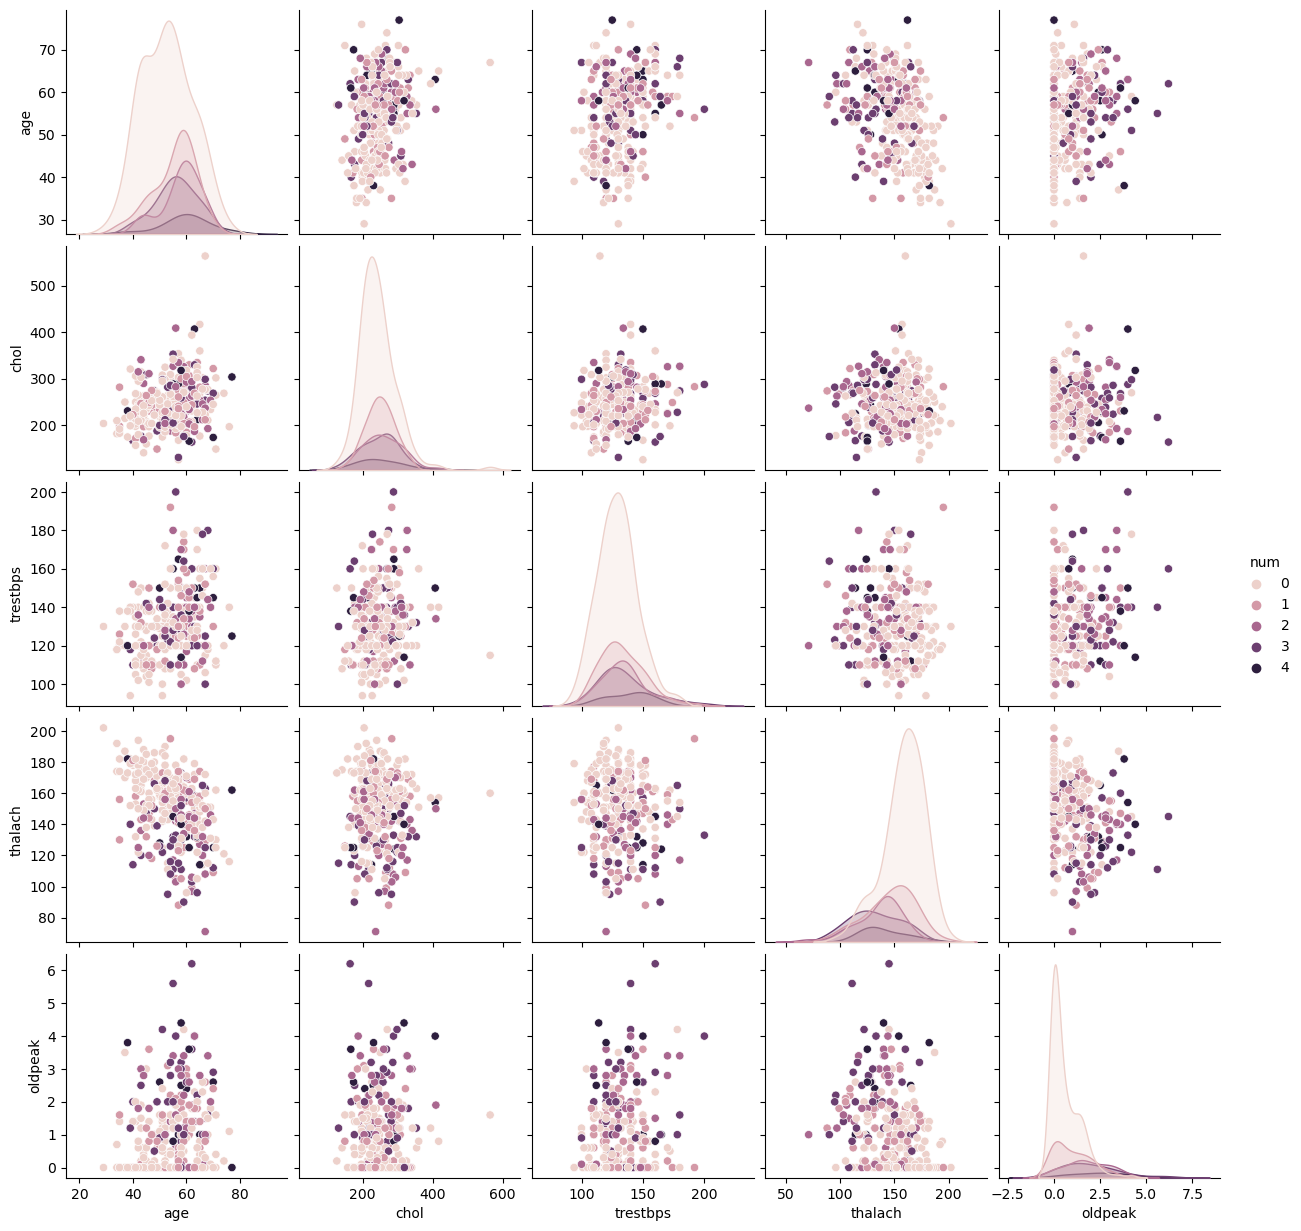

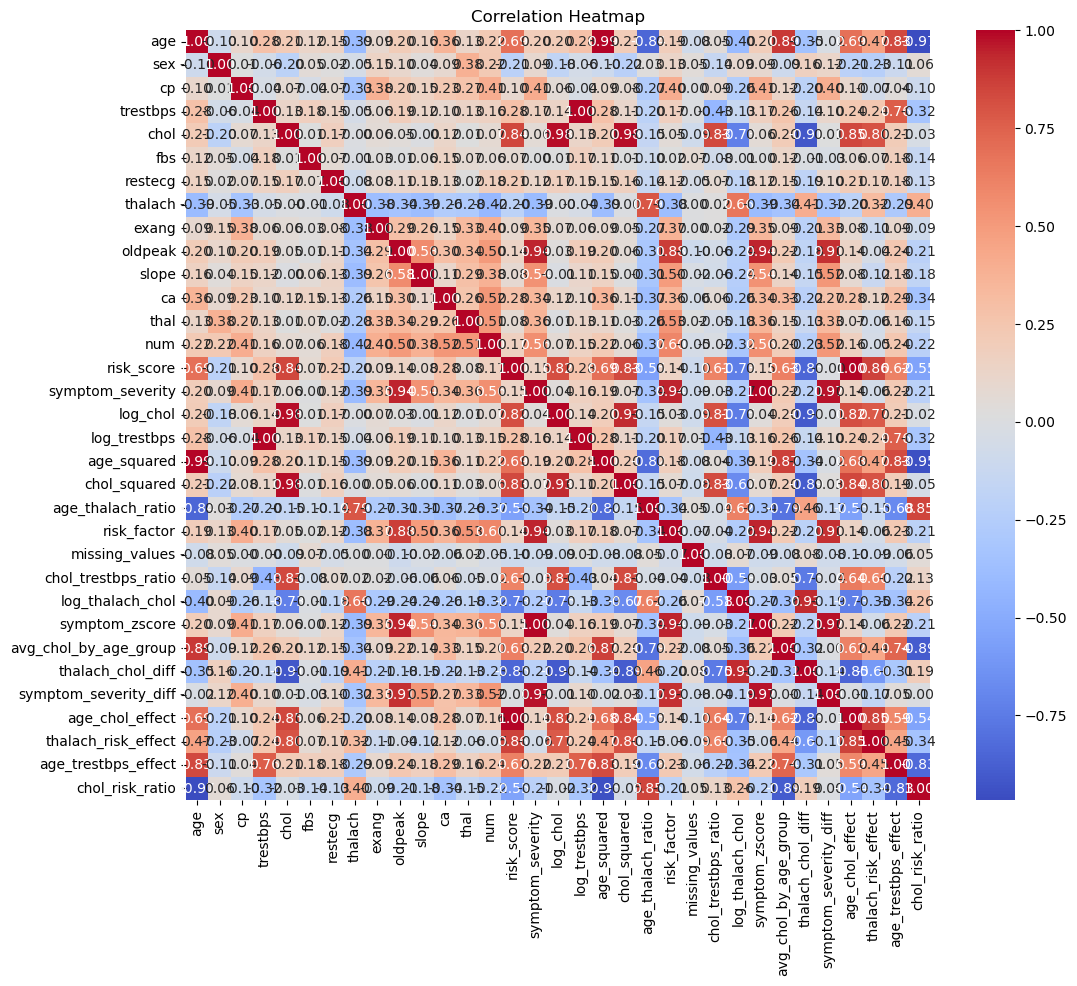

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Visualize distributions
sns.pairplot(df[['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'num']], hue='num')
plt.show()


# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix only for numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [51]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Handling missing values for numeric columns only
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group', 'cholesterol_level', 'bp_level', 'risk_score', 'symptom_severity']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature selection
X = df.drop(['num'], axis=1)
y = df['num']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessing complete.")



Data preprocessing complete.


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Verify class distribution
print("\nTraining class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTesting class distribution:")
print(pd.Series(y_test).value_counts())



Training class distribution:
num
0    131
1     44
2     29
3     28
4     10
Name: count, dtype: int64

Testing class distribution:
num
0    33
1    11
3     7
2     7
4     3
Name: count, dtype: int64


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVM model
svm = SVC(probability=True, random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the SVM model with the best parameters
svm_best = grid_search.best_estimator_


Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}


In [54]:
y_pred = svm_best.predict(X_test)
y_pred_prob = svm_best.predict_proba(X_test)[:, 1]


C:\Users\iamim\AppData\Local\Temp\ipykernel_3724\2440818614.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


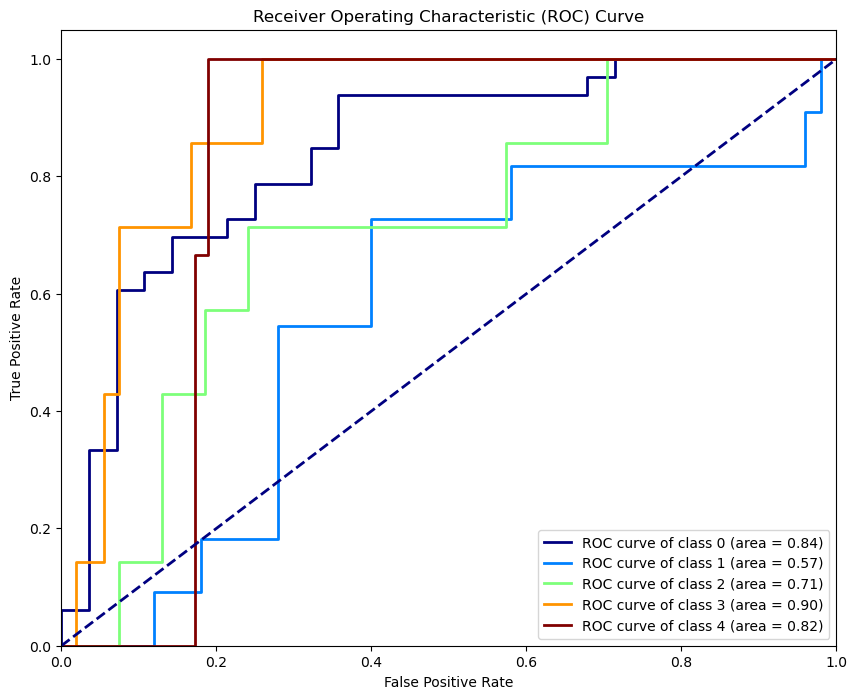

In [58]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define your feature columns and target column
feature_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
                    'oldpeak', 'slope', 'ca', 'thal', 'age_group', 'cholesterol_level', 'bp_level',
                    'risk_score', 'symptom_severity', 'log_chol', 'log_trestbps', 'age_squared',
                    'chol_squared', 'age_thalach_ratio', 'risk_factor', 'missing_values',
                    'chol_trestbps_ratio', 'log_thalach_chol', 'symptom_zscore', 'avg_chol_by_age_group',
                    'thalach_chol_diff', 'symptom_severity_diff', 'age_chol_effect', 'thalach_risk_effect',
                    'age_trestbps_effect', 'chol_risk_ratio']

# Define the feature matrix X and target vector y
X = df[feature_columns]
y = df['num']

# Handling missing values (if any)
X.fillna(X.median(), inplace=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Get decision function scores
y_pred_prob = svm_model.predict_proba(X_test)  # Use predict_proba for multiclass problems

# Binarize the output labels for ROC computation
y_test_bin = label_binarize(y_test, classes=svm_model.classes_)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0, 1, n_classes))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve of class {svm_model.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


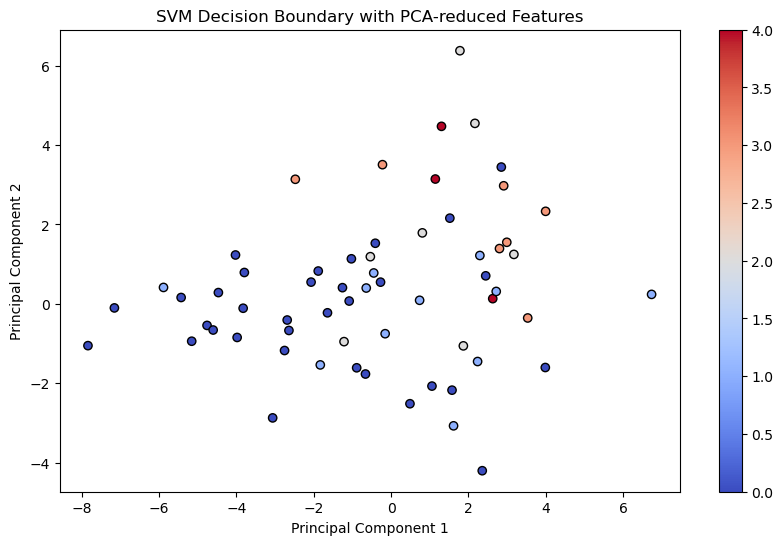

In [59]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot decision boundary
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.title('SVM Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


In [61]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Convert class labels to string labels if necessary
class_names = [str(label) for label in svm_model.classes_]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        33
           1       0.10      0.09      0.10        11
           2       0.12      0.14      0.13         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.54        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.43      0.54      0.48        61



c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
